# Importing Libraries:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("birth.csv")

In [3]:
df.shape

(189, 6)

In [4]:
df.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.232804,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.423741,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.000000,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.000000,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.000000,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.000000,3.440000
max,79.000000,189.000000,45.000000,3.000000,2.000000,4.150000


In [5]:
df.columns

Index(['Mom_weight', 'Mom_height', 'Mom_Age', 'Religion', 'Gender',
       'Birth_Weight'],
      dtype='object')

# Handling Null Vales:

In [6]:
df.isnull().sum()

Mom_weight      0
Mom_height      0
Mom_Age         0
Religion        0
Gender          0
Birth_Weight    0
dtype: int64

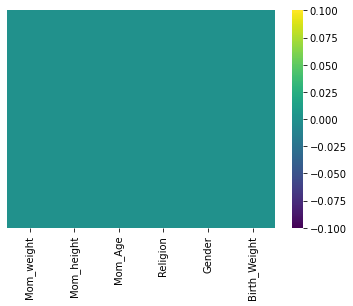

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

# Visualization:

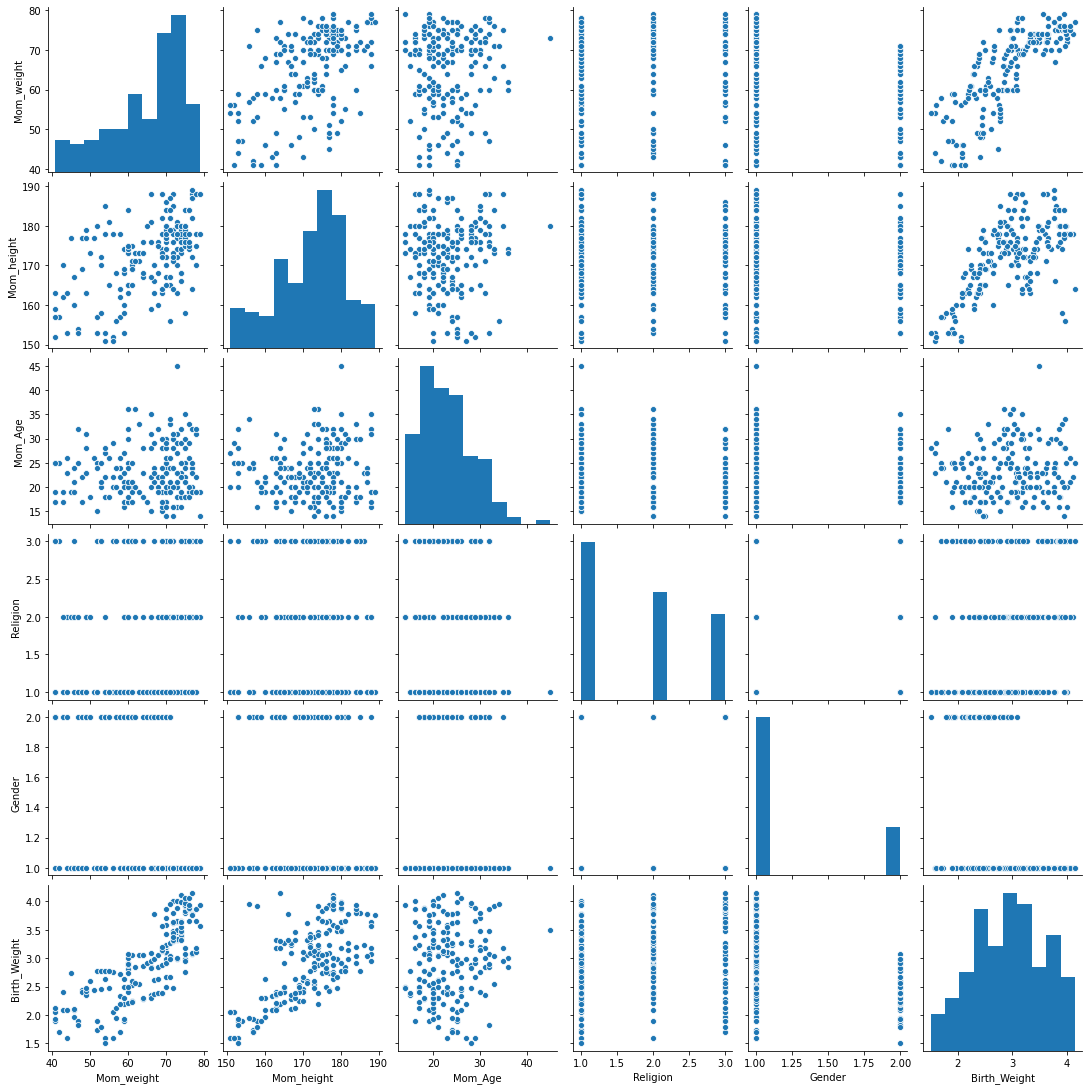

In [8]:
sns.pairplot(df)

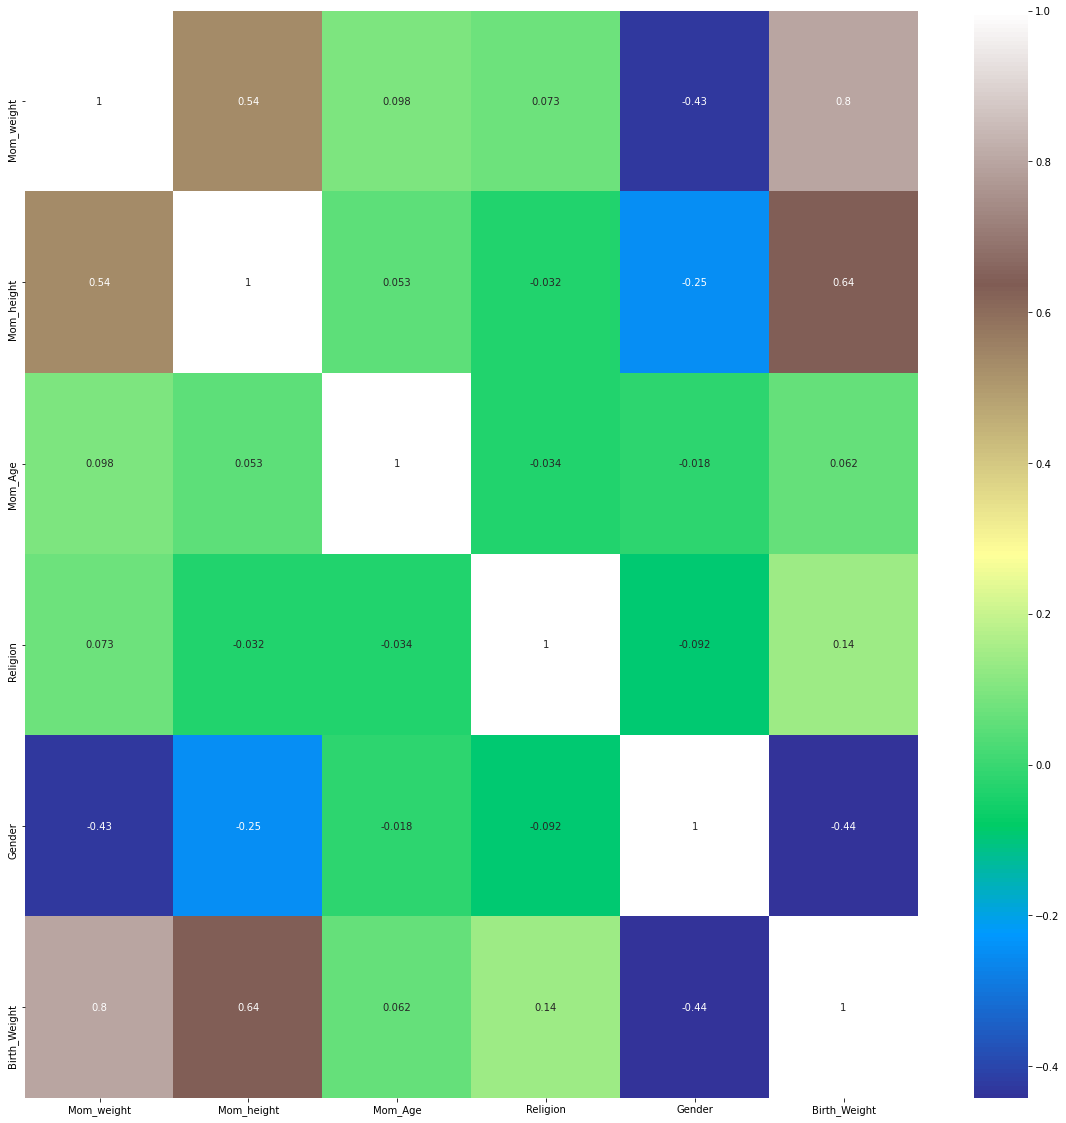

In [9]:
corrmap=df.corr()
features=corrmap.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[features].corr(),annot=True,cmap="terrain")

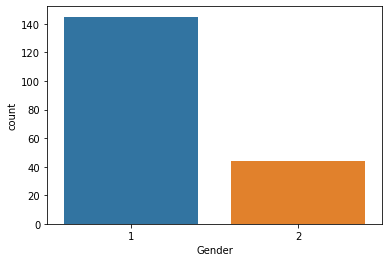

In [10]:
sns.countplot(x='Gender',data=df)

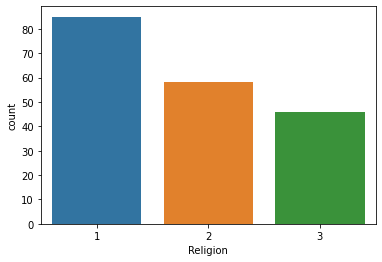

In [11]:
sns.countplot(x='Religion',data=df)

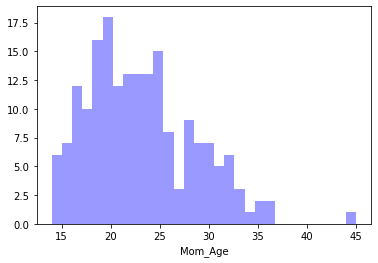

In [12]:
sns.distplot(df['Mom_Age'].dropna(),kde=False,color='blue',bins=30)

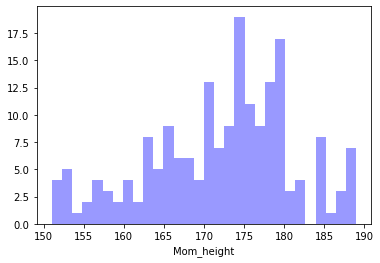

In [13]:
sns.distplot(df['Mom_height'].dropna(),kde=False,color='blue',bins=30)

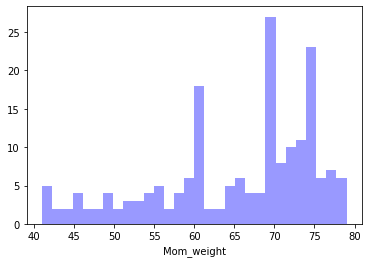

In [14]:
sns.distplot(df['Mom_weight'].dropna(),kde=False,color='blue',bins=30)

# Train Test Split

In [15]:
df.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [16]:
X=df.iloc[:,0:5]
y=df.iloc[:,5]

In [17]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.56528573 0.23954007 0.07317163 0.03062512 0.09137745]


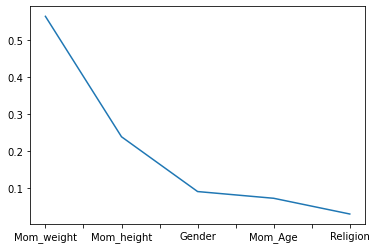

In [19]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot()
plt.show()

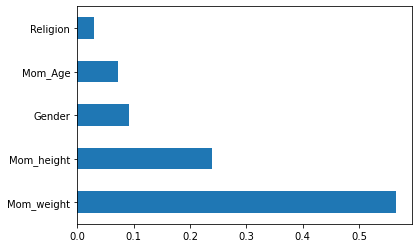

In [20]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [21]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
n_estimators=[int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [23]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [24]:
random_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [27]:
rf_random.best_score_

-0.07965279398511758

In [28]:
predictions=rf_random.predict(X_test)

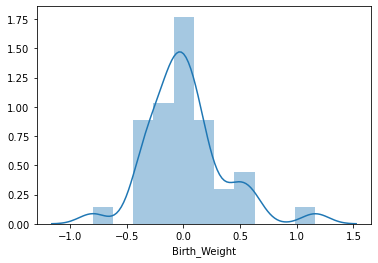

In [29]:
sns.distplot(y_test-predictions)

Text(0.5, 1.0, 'Actual vs Predicted')

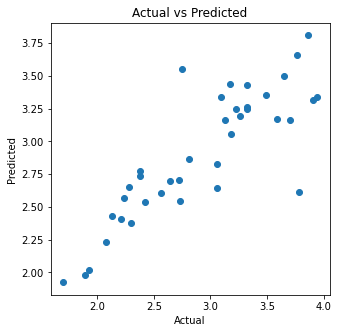

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.24313078947368058
MSE: 0.11649661195526258
RMSE: 0.3413160001454115


# Evaluation:

In [32]:
r2_score(y_test, predictions)

0.7044081627522663

# Prediction:

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':predictions,'Diference':y_test-predictions})
pred_df[0:20]

,Actual Value,Predicted value,Diference
168,2.56,2.60686,-0.04686
90,3.65,3.49946,0.15054
79,3.49,3.35279,0.13721
180,3.13,3.16522,-0.03522
52,3.18,3.05673,0.12327
159,1.93,2.01518,-0.08518
131,3.76,3.65568,0.10432
128,3.86,3.80931,0.05069
40,3.06,2.64612,0.41388
93,2.75,3.54920,-0.79920
